In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
project_path = "/global/cfs/cdirs/des/zhou/spt_lensing/"
import os

In [2]:
shuffle_DSigma_rel_path = "data/DSigma_shuffle.npy"
DSigma_rel_path = "data/DSigma.npy"
DSigma_array = np.load(os.path.join(project_path,DSigma_rel_path))
shuffle_DSigma_array = np.load(os.path.join(project_path,shuffle_DSigma_rel_path))

In [3]:
diff_array = DSigma_array / shuffle_DSigma_array

richness: 20,30
all
[-3.10922535e+01  5.54319498e+01  7.07545802e+01  9.42112919e+01
  7.91099081e+01  6.98455643e+01  5.13949719e+01  3.86933827e+01
  2.40076064e+01  1.56582047e+01  1.07665487e+01  6.67495358e+00
  4.63170345e+00  2.85949770e+00  2.43406003e+00  1.13747823e+00
  5.31390987e-01  2.48507592e-01  1.16240121e-01  5.43899793e-02]
richness: 20,30
SPT
[-2.71006850e+01  4.17070963e+01  6.45888476e+01  1.07410694e+02
  8.00130672e+01  6.90862546e+01  4.86829527e+01  3.71926280e+01
  2.39126824e+01  1.53050698e+01  1.12594624e+01  7.08754532e+00
  4.82008739e+00  2.94880856e+00  2.47538929e+00  1.15667410e+00
  5.40584467e-01  2.52139607e-01  1.18264139e-01  5.53203458e-02]
richness: 20,30
nonSPT
[-2.93794673e+01  7.20904011e+01  8.77440155e+01  9.30141855e+01
  7.26773280e+01  5.85398896e+01  3.86931429e+01  2.75552218e+01
  1.65073793e+01  1.01742543e+01  6.11332567e+00  3.93692646e+00
  2.68189466e+00  1.76253646e+00  1.11786416e+00  5.21944714e-01
  2.44339942e-01  1.14250

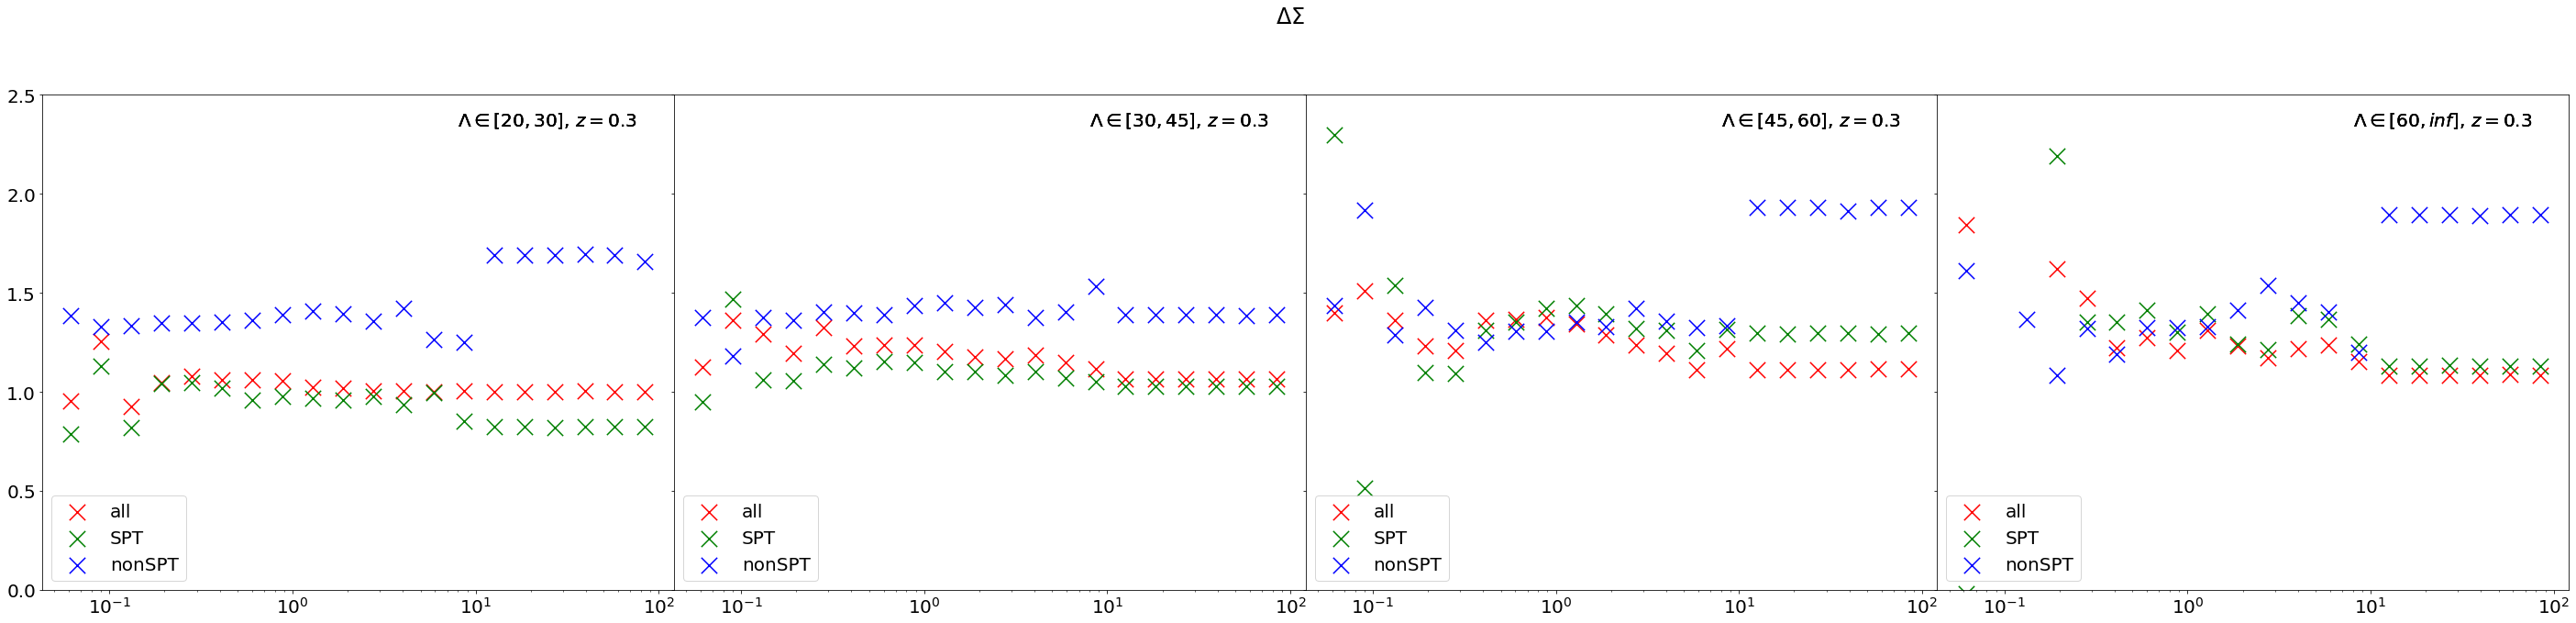

In [4]:
fig,axes = plt.subplots(ncols=4, figsize = [40,10],sharey=True)

modes = ["all","SPT","nonSPT"]
richness_bins=[5,10,14,20,30,45,60,np.inf]

plt.rcParams.update({'font.size':20})


for i in range(len(richness_bins))[-5:-1]:
    lambda_lower, lambda_upper = richness_bins[i],richness_bins[i+1]
    for j,mode in enumerate(modes):
        ax = axes[i-3]
        ax.text(0.80, 0.95, rf'$\Lambda \in [{lambda_lower},{lambda_upper}]$, $z=0.3$', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        # print(i-3,j)
        DSigma = DSigma_array[i-3][j]
        diff = diff_array[i-3][j]
        print(f"richness: {lambda_lower},{lambda_upper}")
        print(mode)
        print(DSigma[2])
        # plot1 = sns.lineplot(x=0.5*(DSigma[0]+DSigma[1]),y=DSigma[2],label=mode,ax=axes[i-3],legend=False)
        if mode == "all":
            color_= "r"
        elif mode == "SPT":
            color_ = "g"
        elif mode == "nonSPT":
            color_ = "b"
        ax.scatter(x=0.5*(DSigma[0]+DSigma[1]),y=diff[2],label=mode,marker="x",
                  c=color_, s=300)
        ax.set_yscale('linear')
        ax.set_xscale('log')
        ax.set_ylim(0.00, 2.5)
        # print(np.mean(DSigma[2]))
        # plot1.set(xscale="log",yscale="log",ylim=(0.01,1000))
        # plot2.set(xscale="log",yscale="log",ylim=(0.01,1E3))
        # plot2.legend(loc="lower left")
        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=20)
        ax.legend(loc="lower left",prop={'size':20})
    
# fig.get_axes()[0].annotate(r'$\Delta \Sigma$', (0.5, 0.95), 
#                             xycoords='figure fraction', ha='center', 
#                             fontsize=15
#                             )

fig.suptitle(r"$\Delta \Sigma$")
fig.tight_layout(pad=2)

plt.subplots_adjust(wspace=0)

In [16]:
print(diff_array)

[[[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
     1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
     1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
     1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
     1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
   [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
     1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
     1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
     1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
     1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
   [ 9.53865047e-01  1.25384906e+00  9.26890357e-01  1.04434190e+00
     1.07759907e+00  1.06237047e+00  1.05901952e+00  1.05392653e+00
     1.02240827e+00  1.01940494e+00  1.00701718e+00  1.00573017e+00
     1.00236389e+00  1.00266477e+00  1.00170250e+00  1.00187708e+00
     1.00151110e+00  1.00290654e+00  9.9810360